In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import BatchNormalization
from sklearn.model_selection import KFold

In [0]:
from google.colab import files
uploaded = files.upload()

Saving telecom_churn.csv to telecom_churn.csv


In [0]:
import io
dataset = pd.read_csv(io.BytesIO(uploaded['telecom_churn.csv']))

In [0]:
dataset.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [0]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

Since the output variable churn is in boolean we can convert into int so that our output is 0 or 1

1 - The customer left

0- didnt leave

In [0]:
dataset['churn'] = dataset['churn'].astype('int64')

In [0]:
dataset['churn'].value_counts(normalize=True)

0    0.855086
1    0.144914
Name: churn, dtype: float64

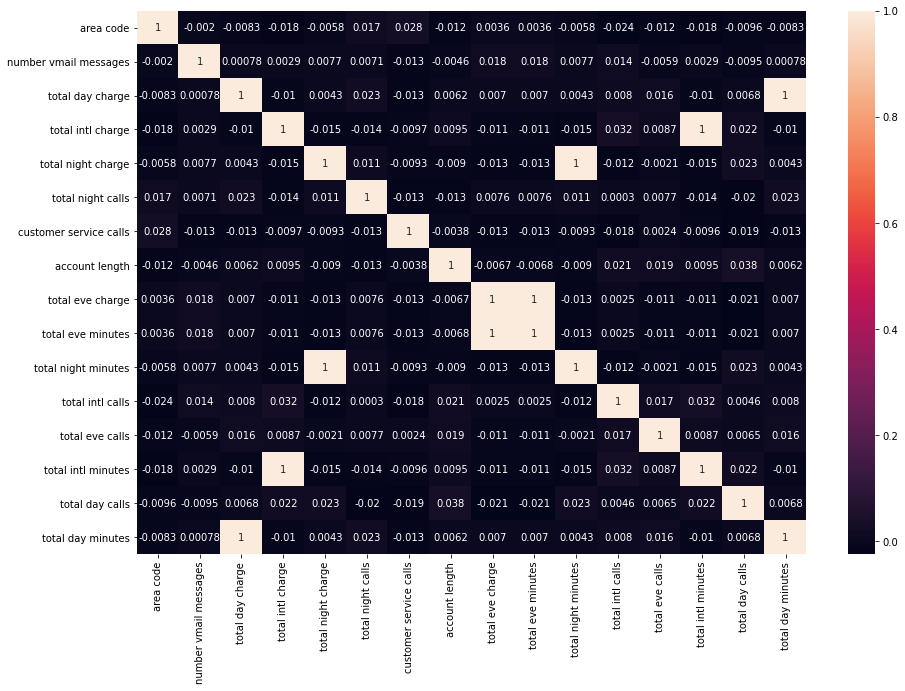

In [0]:
plt.subplots(figsize=(15,10))
features = list(set(dataset.columns)-set(['state','international plan', 'voice mail plan','churn']))
corr_matrix = dataset[features].corr()
sns.heatmap(corr_matrix,annot=True)

clearly total evening minutes and total eve charges are completely depend smilar is the case wiht total international minutes and charges, total day minutes and chages and total night minutes and charges. so we will drop the total charges.

In [0]:
dataset.drop(columns=['total day charge','total intl charge','total eve charge','total night charge'],axis=1,inplace=True)
dataset.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0


Preprocessing

In [0]:
"""X = dataset.drop(['churn'],axis=1).values
y = dataset['churn'].values"""

In [0]:
"""from sklearn.preprocessing import LabelEncoder,OneHotEncoder
encoder1 = LabelEncoder()
X[:,4] = encoder1.fit_transform(X[:,4])
encoder2 = LabelEncoder()
X[:,5] = encoder2.fit_transform(X[:,5])
encoder3 = LabelEncoder()
X[:,0] = encoder3.fit_transform(X[:,0])
print(X[:3,:])"""

[[16 128 415 '382-4657' 0 1 25 265.1 110 197.4 99 244.7 91 10.0 3 1]
 [35 107 415 '371-7191' 0 1 26 161.6 123 195.5 103 254.4 103 13.7 3 1]
 [31 137 415 '358-1921' 0 0 0 243.4 114 121.2 110 162.6 104 12.2 5 0]]


In [0]:
dataset['state'].nunique()

51

In [0]:
'''from sklearn.compose import ColumnTransformer
col_trans = ColumnTransformer([('one_hot_encoder',OneHotEncoder(categories='auto'),[0])], remainder = 'passthrough')
X = col_trans.fit_transform(X)'''

ValueError: ignored

In [0]:
X = dataset.drop(['state','churn','phone number'],axis=1).values
y = dataset['churn'].values

In [0]:
from sklearn.preprocessing import LabelEncoder
encoder1 = LabelEncoder()
X[:,2] = encoder1.fit_transform(X[:,3])
encoder2 = LabelEncoder()
X[:,3] = encoder2.fit_transform(X[:,4])

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [0]:
X[:4,:]

array([[ 0.67648946, -0.52360328,  1.6170861 ,  1.12698528,  1.23488274,
         1.56676695,  0.47664315, -0.07060962, -0.05594035,  0.86674322,
        -0.46549436, -0.08500823, -0.60119509, -0.42793202],
       [ 0.14906505, -0.52360328,  1.6170861 ,  1.21671444,  1.30794844,
        -0.33373776,  1.12450284, -0.10808036,  0.14486653,  1.05857074,
         0.14782467,  1.24048169, -0.60119509, -0.42793202],
       [ 0.9025285 , -0.52360328, -0.61839626, -0.57786869, -0.59175986,
         1.16830364,  0.67598459, -1.57338336,  0.49627857, -0.75686906,
         0.19893459,  0.70312091,  0.21153386, -1.1882185 ],
       [-0.42859027, -0.68883427, -0.61839626, -0.57786869, -0.59175986,
         2.19659605, -1.46693591, -2.74286476, -0.60815927, -0.07855114,
        -0.5677142 , -1.30302599,  1.02426282,  0.33235445]])

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [0]:
X.shape

(3333, 14)

In [0]:
classifier = Sequential([
                           Dense(256, input_shape=(14,)),
                           Activation('relu'),
                           BatchNormalization(),

                           Dense(128),
                           Activation('relu'),
                           BatchNormalization(),

                           Dense(1),
                           Activation('sigmoid')
  ])
classifier.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
classifier.fit(X_train,y_train,epochs=20,batch_size=10)
acc=classifier.evaluate(X_test,y_test)
print(acc)

Epoch 1/20
267/267 [==============================] - 0s 2ms/step - loss: 0.4498 - accuracy: 0.7982
Epoch 2/20
267/267 [==============================] - 0s 2ms/step - loss: 0.3203 - accuracy: 0.8837
Epoch 3/20
267/267 [==============================] - 0s 2ms/step - loss: 0.2963 - accuracy: 0.8953
Epoch 4/20
267/267 [==============================] - 0s 2ms/step - loss: 0.2795 - accuracy: 0.8976
Epoch 5/20
267/267 [==============================] - 0s 2ms/step - loss: 0.2698 - accuracy: 0.9010
Epoch 6/20
267/267 [==============================] - 0s 2ms/step - loss: 0.2511 - accuracy: 0.9051
Epoch 7/20
267/267 [==============================] - 0s 2ms/step - loss: 0.2421 - accuracy: 0.9145
Epoch 8/20
267/267 [==============================] - 0s 2ms/step - loss: 0.2260 - accuracy: 0.9209
Epoch 9/20
267/267 [==============================] - 1s 2ms/step - loss: 0.2286 - accuracy: 0.9182
Epoch 10/20
267/267 [==============================] - 0s 2ms/step - loss: 0.2238 - accuracy: 0.9186

Using k folds

for that we need not split X,y into test and training set

In [0]:
score=[]
cv = KFold(n_splits = 10, shuffle=False, random_state=None)
for train_index,test_index in cv.split(X):
  classifier = Sequential([
                           Dense(256, input_shape=(14,)),
                           Activation('relu'),
                           BatchNormalization(),

                           Dense(128),
                           Activation('relu'),
                           BatchNormalization(),

                           Dense(1),
                           Activation('sigmoid')
  ])
  classifier.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
  X_train,X_test = X[train_index],X[test_index]
  y_train,y_test = y[train_index],y[test_index]
  classifier.fit(X_train,y_train,epochs=10)
  acc = classifier.evaluate(X_test,y_test)
  score.append(acc)
  print(acc)

Epoch 1/10
94/94 [==============================] - 0s 2ms/step - loss: 0.5260 - accuracy: 0.7569
Epoch 2/10
94/94 [==============================] - 0s 2ms/step - loss: 0.3011 - accuracy: 0.8960
Epoch 3/10
94/94 [==============================] - 0s 2ms/step - loss: 0.2561 - accuracy: 0.9126
Epoch 4/10
94/94 [==============================] - 0s 2ms/step - loss: 0.2335 - accuracy: 0.9123
Epoch 5/10
94/94 [==============================] - 0s 2ms/step - loss: 0.2201 - accuracy: 0.9240
Epoch 6/10
94/94 [==============================] - 0s 2ms/step - loss: 0.2041 - accuracy: 0.9276
Epoch 7/10
94/94 [==============================] - 0s 2ms/step - loss: 0.1981 - accuracy: 0.9296
Epoch 8/10
94/94 [==============================] - 0s 2ms/step - loss: 0.1784 - accuracy: 0.9340
Epoch 9/10
94/94 [==============================] - 0s 2ms/step - loss: 0.1784 - accuracy: 0.9313
Epoch 10/10
11/11 [==============================] - 0s 2ms/step - loss: 0.2706 - accuracy: 0.9102
[0.2705785036087036